In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [20]:
pokemon = pd.read_csv('Pokemon.csv')

In [21]:
pokemon.shape

(800, 12)

In [22]:
pokemon.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [23]:
superheros.shape

(667, 168)

In [24]:
pokemon.drop(columns=['Type 2'], inplace=True)

In [25]:
pokemon.head(5)

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,39,52,43,60,50,65,1,False


In [14]:
pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [26]:

missing_values_count = pokemon.isnull().sum()
print(missing_values_count)

#             0
Name          1
Type 1        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64


In [27]:
pokemon_revised = pokemon.iloc[:, 3:9]

In [28]:
pokemon_revised.head(5)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [29]:
legendary_total = pokemon['Legendary'].sum()
print('Baseline accuracy for Legendary is: ' + str(round((legendary_total/pokemon.shape[0])*100, 2)) + '%')

Baseline accuracy for Legendary is: 8.12%


In [30]:
from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(pokemon_revised, pokemon['Legendary'], test_size=0.3)

In [31]:
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, y_train)

print('R² for our model:')
print(lass.score(X_train, y_train))

origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for our Model:')
print(origparams)

R² for our model:
0.27413206467085016

Parameter estimates for our Model:
[ 3.34416128e-04  1.11293640e-03  3.18447364e-04  1.95489799e-03
  1.27575801e-03  9.52315304e-04 -3.50613597e-01]


In [32]:
print(lass.score(X_test, y_test))

0.23469216024356654


In [33]:
#Create dataframe for our features
pokemon_features = pokemon_revised.loc[:,['HP','Sp. Atk']]

In [34]:
#Get dummies for Legendary column
pokemon['Legendary'] = pd.get_dummies(pokemon['Legendary'])

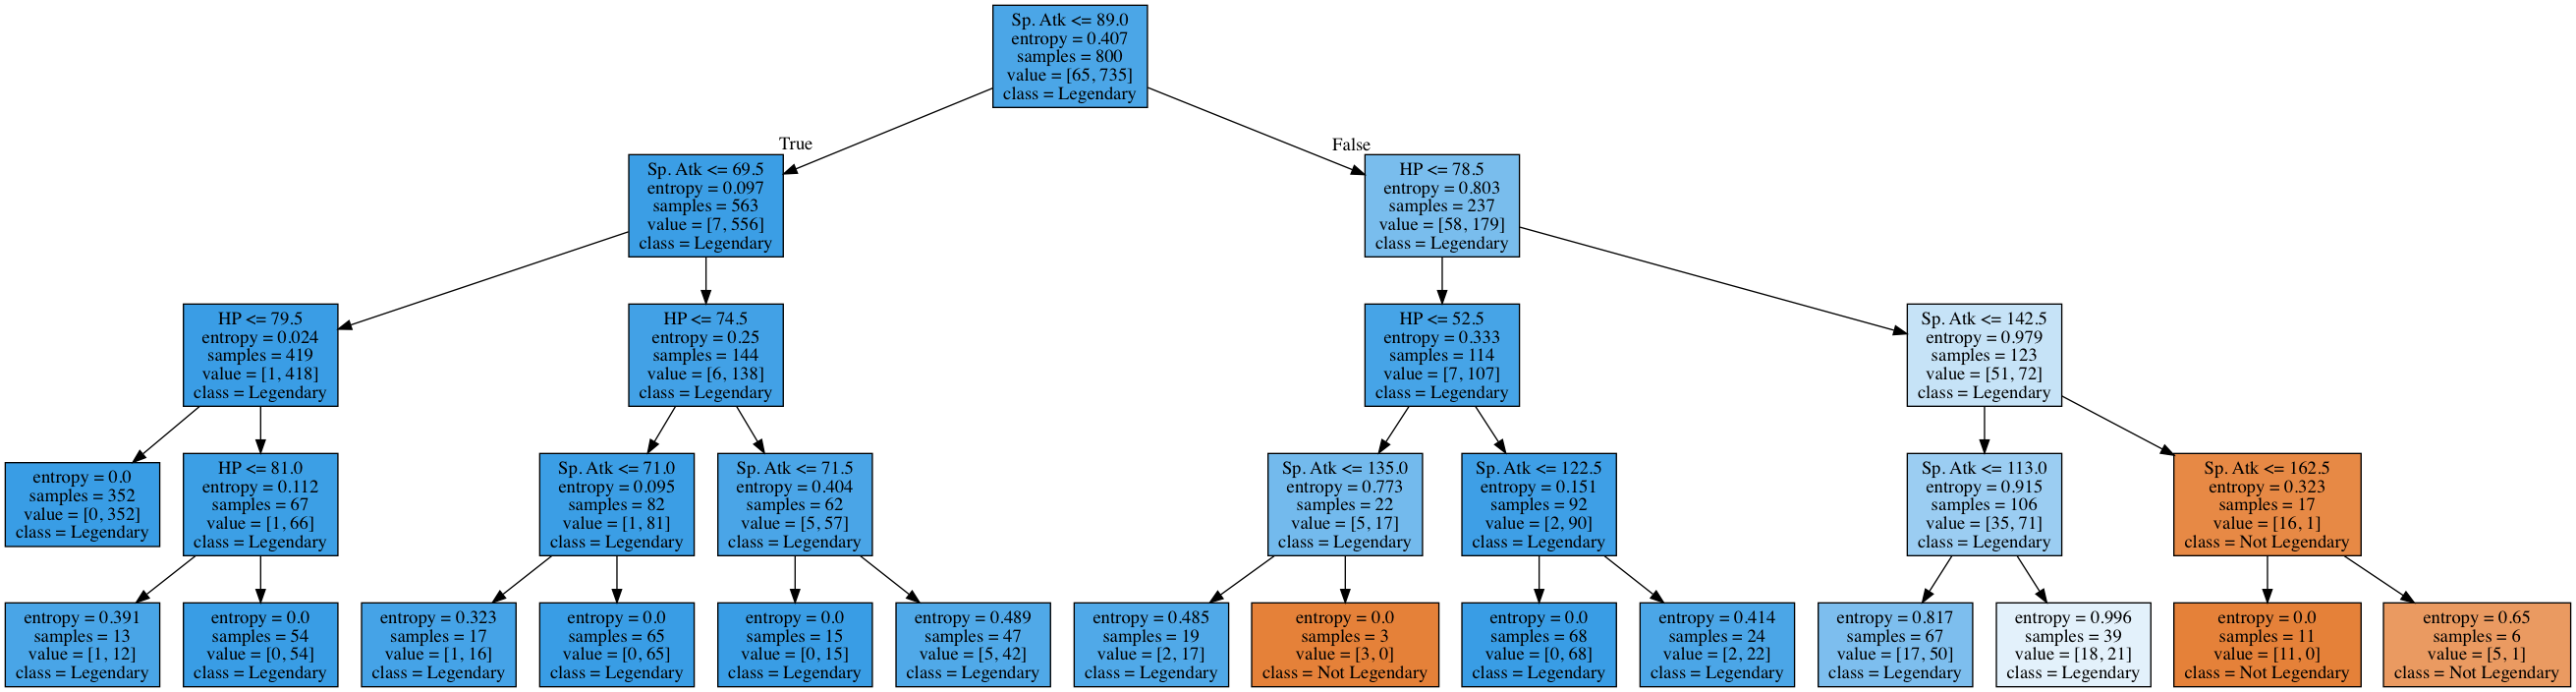

Program Executed in 0.93


In [36]:
#Initialize time
import timeit
start = timeit.default_timer()

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=4)

decision_tree.fit(pokemon_features, pokemon['Legendary'])

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names= pokemon_features.columns,
    class_names=['Not Legendary', 'Legendary'],
    filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

#Print time
stop = timeit.default_timer()
execution_time = stop - start
print("Program Executed in {}".format(round(execution_time, 2)))

In [37]:
#Validate the model with cross-validation

print('Using Cross-Validation, our model produces the following accuracy for all data: ' + str(cross_val_score(decision_tree, pokemon_features, pokemon['Legendary'], cv=5)))

Using Cross-Validation, our model produces the following accuracy for all data: [0.925   0.95625 0.93125 0.8875  0.94375]


In [38]:
# Use train_test_split again to create the necessary training and test groups
X_train2, X_test2, y_train2, y_test2 = train_test_split(pokemon_features, pokemon['Legendary'], test_size=0.3)

In [39]:
#Validate model using train_test_split

print('Using Train_Test_Split, our model produces the following accuracy: ' + str(decision_tree.fit(X_train2, y_train2).score(X_test2, y_test2)))

Using Train_Test_Split, our model produces the following accuracy: 0.9416666666666667


In [40]:
#Initialize time
import timeit
start = timeit.default_timer()

#Instantiate the model
rfc = ensemble.RandomForestClassifier()
X = pokemon_features
Y = pokemon['Legendary']

#Validate the model
print(cross_val_score(rfc, X, Y, cv=5))

#Print time
stop = timeit.default_timer()
execution_time = stop - start
print("Program Executed in {}".format(round(execution_time, 2)))


[0.8875  0.91875 0.93125 0.8875  0.925  ]
Program Executed in 0.29
